In [1]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
from pandas.io.parsers import read_csv
%matplotlib inline


In [2]:
fname = './training.csv'
df = read_csv(os.path.expanduser(fname))  # data frame
df = df.dropna()
# df.columns
# image_series.shape

In [291]:
image_series = df["Image"].apply(lambda im: np.fromstring(im, dtype=np.int64, sep=" "))
dir(image_series[0])

['T',
 '__abs__',
 '__add__',
 '__and__',
 '__array__',
 '__array_finalize__',
 '__array_interface__',
 '__array_prepare__',
 '__array_priority__',
 '__array_struct__',
 '__array_wrap__',
 '__bool__',
 '__class__',
 '__contains__',
 '__copy__',
 '__deepcopy__',
 '__delattr__',
 '__delitem__',
 '__dir__',
 '__divmod__',
 '__doc__',
 '__eq__',
 '__float__',
 '__floordiv__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getitem__',
 '__gt__',
 '__hash__',
 '__iadd__',
 '__iand__',
 '__ifloordiv__',
 '__ilshift__',
 '__imatmul__',
 '__imod__',
 '__imul__',
 '__index__',
 '__init__',
 '__int__',
 '__invert__',
 '__ior__',
 '__ipow__',
 '__irshift__',
 '__isub__',
 '__iter__',
 '__itruediv__',
 '__ixor__',
 '__le__',
 '__len__',
 '__lshift__',
 '__lt__',
 '__matmul__',
 '__mod__',
 '__mul__',
 '__ne__',
 '__neg__',
 '__new__',
 '__or__',
 '__pos__',
 '__pow__',
 '__radd__',
 '__rand__',
 '__rdivmod__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__rfloordiv__',
 '__rlshift__',
 '__r

In [292]:
image_series.tolist()

[array([238, 236, 237, ...,  70,  75,  90]),
 array([219, 215, 204, ...,   1,   1,   1]),
 array([144, 142, 159, ...,  78,  78,  77]),
 array([193, 192, 193, ...,   1,   1,   1]),
 array([147, 148, 160, ..., 140, 170, 176]),
 array([167, 169, 170, ...,  78,  86,  95]),
 array([109, 109, 125, ..., 117, 108, 103]),
 array([178, 177, 178, ..., 100,  72,  74]),
 array([164, 158, 118, ...,  85, 102, 138]),
 array([226, 227, 225, ..., 118, 114, 113]),
 array([ 52,  51,  54, ..., 193, 190, 187]),
 array([142, 124, 123, ..., 190, 192, 190]),
 array([ 86,  93, 106, ..., 137, 136, 135]),
 array([75, 65, 63, ..., 99, 94, 94]),
 array([119, 106, 101, ...,  99,  79,  62]),
 array([ 52,  54,  74, ..., 189, 172, 181]),
 array([201, 200, 202, ...,   1,   1,   1]),
 array([202, 201, 201, ...,   1,   1,   1]),
 array([181, 182, 182, ...,  85,  88,  87]),
 array([ 64,  56,  53, ...,  94, 154, 187]),
 array([240, 240, 240, ..., 121, 118, 115]),
 array([245, 245, 245, ..., 136, 150, 149]),
 array([185, 185

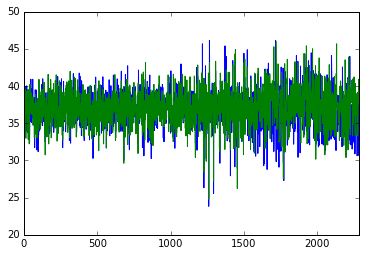

In [293]:
df["left_eye_center_y"].plot()
df["right_eye_center_y"].plot()

In [294]:
def convertXYColumns(x_list, y_list):
    result = np.zeros(2140)
    for i, x_elem in enumerate(x_list):
            result[i] = x_elem + y_list[i]*96 # the image is 96 by 96
    return result


left_eye_center = convertXYColumns(df["left_eye_center_x"].tolist(),df["left_eye_center_y"].tolist())
right_eye_center = convertXYColumns(df["right_eye_center_x"].tolist(),df["right_eye_center_y"].tolist())
left_eye_inner_corner  = convertXYColumns(df["left_eye_inner_corner_x"].tolist(),df["left_eye_inner_corner_y"].tolist())
left_eye_outer_corner = convertXYColumns(df["left_eye_outer_corner_x"].tolist(),df["left_eye_outer_corner_y"].tolist())
right_eye_inner_corner = convertXYColumns(df["right_eye_inner_corner_x"].tolist(),df["right_eye_inner_corner_y"].tolist())
right_eye_outer_corner = convertXYColumns(df["right_eye_outer_corner_x"].tolist(),df["right_eye_outer_corner_y"].tolist())
left_eyebrow_inner_end = convertXYColumns(df["left_eyebrow_inner_end_x"].tolist(),df["left_eyebrow_inner_end_y"].tolist())
left_eyebrow_outer_end = convertXYColumns(df["left_eyebrow_outer_end_x"].tolist(),df["left_eyebrow_outer_end_y"].tolist())
right_eyebrow_inner_end = convertXYColumns(df["right_eyebrow_inner_end_x"].tolist(),df["right_eyebrow_inner_end_y"].tolist())
right_eyebrow_outer_end = convertXYColumns(df["right_eyebrow_outer_end_x"].tolist(),df["right_eyebrow_outer_end_y"].tolist())
nose_tip = convertXYColumns(df["nose_tip_x"].tolist(),df["nose_tip_y"].tolist())
mouth_left_corner = convertXYColumns(df["mouth_left_corner_x"].tolist(),df["mouth_left_corner_y"].tolist())
mouth_right_corner = convertXYColumns(df["mouth_right_corner_x"].tolist(),df["mouth_right_corner_y"].tolist())
mouth_center_top_lip = convertXYColumns(df["mouth_center_top_lip_x"].tolist(),df["mouth_center_top_lip_y"].tolist())
mouth_center_bottom_lip = convertXYColumns(df["mouth_center_bottom_lip_x"].tolist(),df["mouth_center_bottom_lip_y"].tolist())


data_array = np.array([left_eye_center, right_eye_center, 
                       left_eye_inner_corner, left_eye_outer_corner, 
                       right_eye_inner_corner, right_eye_outer_corner, 
                       left_eyebrow_inner_end, left_eyebrow_outer_end, 
                       right_eyebrow_inner_end, right_eyebrow_outer_end, 
                       nose_tip, mouth_left_corner, mouth_right_corner, 
                       mouth_center_top_lip, mouth_center_bottom_lip])
data_array = data_array.T

header = ["left_eye_center", "right_eye_center", 
          "left_eye_inner_corner", "left_eye_outer_corner", 
          "right_eye_inner_corner", "right_eye_outer_corner", 
          "left_eyebrow_inner_end", "left_eyebrow_outer_end", 
          "right_eyebrow_inner_end", "right_eyebrow_outer_end", 
          "nose_tip", "mouth_left_corner", "mouth_right_corner", 
          "mouth_center_top_lip", "mouth_center_bottom_lip", "Image", "cluster_id"]

data_array.shape

(2140, 15)

In [295]:
from sklearn.cluster import KMeans

cluster_value = KMeans(n_clusters=4).fit_predict(data_array)

cluster_value
# clusterinfo = pd.DataFrame()
# clusterinfo["left_eye_center"]=left_eye_center
# clusterinfo["right_eye_center"]= right_eye_center
# clusterinfo["left_eye_inner_corner"]=left_eye_inner_corner
# clusterinfo["left_eye_outer_corner"]=left_eye_outer_corner 
# clusterinfo["right_eye_inner_corner"]=right_eye_inner_corner
# clusterinfo["right_eye_outer_corner"]=right_eye_outer_corner
# clusterinfo["left_eyebrow_inner_end"]=left_eyebrow_inner_end
# clusterinfo["left_eyebrow_outer_end"]=left_eyebrow_outer_end 
# clusterinfo["right_eyebrow_inner_end"]=right_eyebrow_inner_end
# clusterinfo["right_eyebrow_outer_end"]=right_eyebrow_outer_end
# clusterinfo["nose_tip"]=nose_tip
# clusterinfo["mouth_left_corner"]=mouth_left_corner
# clusterinfo["mouth_right_corner"]=mouth_right_corner
# clusterinfo["mouth_center_top_lip"]=mouth_center_top_lip
# clusterinfo["mouth_center_bottom_lip"]=mouth_center_bottom_lip
# clusterinfo["Image"] = image_series.tolist()
# clusterinfo["cluster_id"]=cluster_value

# 

array([1, 1, 0, ..., 3, 2, 2], dtype=int32)

In [296]:

data_array = np.array([left_eye_center, right_eye_center, 
                       left_eye_inner_corner, left_eye_outer_corner, 
                       right_eye_inner_corner, right_eye_outer_corner, 
                       left_eyebrow_inner_end, left_eyebrow_outer_end, 
                       right_eyebrow_inner_end, right_eyebrow_outer_end, 
                       nose_tip, mouth_left_corner, mouth_right_corner, 
                       mouth_center_top_lip, mouth_center_bottom_lip, image_series, cluster_value])


# clusterinfo.to_csv("test.csv", header=header)
data_array = data_array.T
import csv

f = open('some.csv', 'w')

writer = csv.writer(f, lineterminator='\n')
writer.writerow(header)
writer.writerows(data_array)
f.close()


In [6]:
import os

import numpy as np
from pandas.io.parsers import read_csv



fname = './training.csv'
df = read_csv(os.path.expanduser(fname))  # data frame
df = df.dropna()
image_series = df["Image"].apply(lambda im: np.fromstring(im, dtype=np.int64, sep=" "))


def convertXYColumns(x_list, y_list):
    result = np.zeros(2140)
    for i, x_elem in enumerate(x_list):
            result[i] = x_elem + y_list[i]*96 # the image is 96 by 96
    return result


left_eye_center = convertXYColumns(df["left_eye_center_x"].tolist(),df["left_eye_center_y"].tolist())
right_eye_center = convertXYColumns(df["right_eye_center_x"].tolist(),df["right_eye_center_y"].tolist())
left_eye_inner_corner  = convertXYColumns(df["left_eye_inner_corner_x"].tolist(),df["left_eye_inner_corner_y"].tolist())
left_eye_outer_corner = convertXYColumns(df["left_eye_outer_corner_x"].tolist(),df["left_eye_outer_corner_y"].tolist())
right_eye_inner_corner = convertXYColumns(df["right_eye_inner_corner_x"].tolist(),df["right_eye_inner_corner_y"].tolist())
right_eye_outer_corner = convertXYColumns(df["right_eye_outer_corner_x"].tolist(),df["right_eye_outer_corner_y"].tolist())
left_eyebrow_inner_end = convertXYColumns(df["left_eyebrow_inner_end_x"].tolist(),df["left_eyebrow_inner_end_y"].tolist())
left_eyebrow_outer_end = convertXYColumns(df["left_eyebrow_outer_end_x"].tolist(),df["left_eyebrow_outer_end_y"].tolist())
right_eyebrow_inner_end = convertXYColumns(df["right_eyebrow_inner_end_x"].tolist(),df["right_eyebrow_inner_end_y"].tolist())
right_eyebrow_outer_end = convertXYColumns(df["right_eyebrow_outer_end_x"].tolist(),df["right_eyebrow_outer_end_y"].tolist())
nose_tip = convertXYColumns(df["nose_tip_x"].tolist(),df["nose_tip_y"].tolist())
mouth_left_corner = convertXYColumns(df["mouth_left_corner_x"].tolist(),df["mouth_left_corner_y"].tolist())
mouth_right_corner = convertXYColumns(df["mouth_right_corner_x"].tolist(),df["mouth_right_corner_y"].tolist())
mouth_center_top_lip = convertXYColumns(df["mouth_center_top_lip_x"].tolist(),df["mouth_center_top_lip_y"].tolist())
mouth_center_bottom_lip = convertXYColumns(df["mouth_center_bottom_lip_x"].tolist(),df["mouth_center_bottom_lip_y"].tolist())


data_array = np.array([left_eye_center, right_eye_center, 
                       left_eye_inner_corner, left_eye_outer_corner, 
                       right_eye_inner_corner, right_eye_outer_corner, 
                       left_eyebrow_inner_end, left_eyebrow_outer_end, 
                       right_eyebrow_inner_end, right_eyebrow_outer_end, 
                       nose_tip, mouth_left_corner, mouth_right_corner, 
                       mouth_center_top_lip, mouth_center_bottom_lip])
# data_array = data_array.T



from sklearn.cluster import KMeans

cluster_value = KMeans(n_clusters=10).fit_predict(data_array)



In [30]:
for i in range(15):
    print(i, np.max(data_array[i]), np.min(data_array[i]), (np.max(data_array[i])- np.min(data_array[i]))/10)

0 4496.9976037 2354.92999245 214.206761125
1 4441.67245283 2404.08670189 203.758575095
2 4587.76736842 2667.14083019 192.062653824
3 4843.63533902 2600.52733585 224.310800317
4 4342.88372816 2556.48217358 178.640155457
5 4819.39079245 2565.28979591 225.410099654
6 3928.23594366 1579.38165467 234.885428899
7 4770.83371785 1091.12006038 367.971365747
8 3834.98073239 1624.92847059 221.00522618
9 4317.21781133 1280.11109434 303.710671698
10 7340.10847081 4036.61585455 330.349261627
11 9154.08297811 5547.29119674 360.679178137
12 9005.95547666 5468.8832761 353.707220056
13 9066.25726081 5478.02379531 358.82334655
14 9244.98081359 5527.34799773 371.763281587


In [63]:
prepared_data = np.zeros((15, 10))
count_data = np.zeros((15,10))

for label_index in range(15):
    
    min_in_array = np.min(data_array[label_index])
    diff = (np.max(data_array[label_index])-min_in_array)/10
    
    for diff_index in range(10):
        
        prepared_data[label_index][diff_index] = min_in_array + diff*diff_index
        count = 0
        for elem in data_array[label_index]: 
            if min_in_array+(diff*diff_index) <= elem < min_in_array + (diff*(diff_index+1)):
                count += 1
                
        count_data[label_index][diff_index] = count

In [76]:
for i in range(10):
    print(prepared_data[i])
    print(count_data[i])

[ 2354.92999245  2569.13675358  2783.3435147   2997.55027583  3211.75703695
  3425.96379808  3640.1705592   3854.37732033  4068.58408145  4282.79084258]
[   2.    3.   14.   74.  296.  817.  721.  175.   26.   11.]
[ 2404.08670189  2607.84527698  2811.60385207  3015.36242717  3219.12100226
  3422.87957736  3626.63815245  3830.39672755  4034.15530264  4237.91387774]
[   2.    3.   10.   83.  302.  878.  622.  196.   35.    8.]
[ 2667.14083019  2859.20348401  3051.26613784  3243.32879166  3435.39144548
  3627.45409931  3819.51675313  4011.57940695  4203.64206078  4395.7047146 ]
[   4.    5.   26.  135.  583.  840.  464.   68.   10.    4.]
[ 2600.52733585  2824.83813617  3049.14893648  3273.4597368   3497.77053712
  3722.08133743  3946.39213775  4170.70293807  4395.01373839  4619.3245387 ]
[  11.   27.   70.  317.  782.  642.  228.   44.   16.    2.]
[ 2556.48217358  2735.12232904  2913.7624845   3092.40263996  3271.04279541
  3449.68295087  3628.32310633  3806.96326179  3985.60341724  41

In [77]:
count_equi_value = np.zeros((30,10))
for i in range(15):
    count_equi_value[2*i] = prepared_data[i]
    count_equi_value[2*i+1] = count_data[i]

count_equi_value[3]

array([   2.,    3.,   10.,   83.,  302.,  878.,  622.,  196.,   35.,    8.])

In [78]:


header = ["left_eye_center", "right_eye_center", 
          "left_eye_inner_corner", "left_eye_outer_corner", 
          "right_eye_inner_corner", "right_eye_outer_corner", 
          "left_eyebrow_inner_end", "left_eyebrow_outer_end", 
          "right_eyebrow_inner_end", "right_eyebrow_outer_end", 
          "nose_tip", "mouth_left_corner", "mouth_right_corner", 
          "mouth_center_top_lip", "mouth_center_bottom_lip"]

count_equi_value = count_equi_value.T

header_equi = []
for e in header:
    header_equi.append(e)
    header_equi.append(e+"_count")
    
    
header_equi


['left_eye_center',
 'left_eye_center_count',
 'right_eye_center',
 'right_eye_center_count',
 'left_eye_inner_corner',
 'left_eye_inner_corner_count',
 'left_eye_outer_corner',
 'left_eye_outer_corner_count',
 'right_eye_inner_corner',
 'right_eye_inner_corner_count',
 'right_eye_outer_corner',
 'right_eye_outer_corner_count',
 'left_eyebrow_inner_end',
 'left_eyebrow_inner_end_count',
 'left_eyebrow_outer_end',
 'left_eyebrow_outer_end_count',
 'right_eyebrow_inner_end',
 'right_eyebrow_inner_end_count',
 'right_eyebrow_outer_end',
 'right_eyebrow_outer_end_count',
 'nose_tip',
 'nose_tip_count',
 'mouth_left_corner',
 'mouth_left_corner_count',
 'mouth_right_corner',
 'mouth_right_corner_count',
 'mouth_center_top_lip',
 'mouth_center_top_lip_count',
 'mouth_center_bottom_lip',
 'mouth_center_bottom_lip_count']

In [80]:
import csv
f = open('equi_width_count_data.csv', 'w')

writer = csv.writer(f, lineterminator='\n')
writer.writerow(header_equi)
writer.writerows(count_equi_value)
f.close()